## Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

## Read Data

In [2]:
df = pd.read_csv('stats.csv')

In [3]:
df.head()

,Name,Age,Height,Market Value,img_url,Position,Team,Total played,Started,Minutes per game,...,Succ. dribbles,Total duels won,Aerial duels won,Fouls,Was fouled,Offsides,Goal kicks per game,Yellow,Yellow-red,Red
0,Alex,31,"1,87 m","Rp4,35B",https://lapangbola-rails-files.s3.ap-southeast...,CF,Dewa United FC,32,30,94,...,1.9 (70%),7.0 (37%),1.7 (50%),0.9,1.7,0.6,NaN,3,1,1
1,Majed Osman,30,"1,83 m","Rp6,52B",https://lapangbola-rails-files.s3.ap-southeast...,LW,Dewa United FC,30,21,70,...,4.9 (75%),8.8 (47%),0.2 (33%),1.0,1.4,0.3,NaN,3,0,0
2,Septian Bagaskara,26,"1,83 m","Rp2,61B",https://lapangbola-rails-files.s3.ap-southeast...,CF,Dewa United FC,19,4,29,...,0.3 (55%),1.8 (44%),1.1 (61%),0.3,0.2,0.1,NaN,3,0,0
3,Rangga Muslim Perkasa,30,"1,66 m","Rp2,17B",https://lapangbola-rails-files.s3.ap-southeast...,AMF,Dewa United FC,9,5,43,...,0.8 (88%),2.4 (32%),0.2 (33%),1.0,0.8,0.1,NaN,2,0,0
4,Egy Maulana Vikri,24,"1,70 m","Rp4,35B",https://lapangbola-rails-files.s3.ap-southeast...,RW,Dewa United FC,29,25,81,...,3.2 (76%),6.6 (40%),0.3 (24%),1.2,1.3,0.2,NaN,1,1,1


## Check Data

In [4]:
df.shape

(458, 38)

In [5]:
df.columns

Index(['Name', 'Age', 'Height', 'Market Value', 'img_url', 'Position', 'Team',
       'Total played', 'Started', 'Minutes per game',
       'Goals conceded per game', 'Saves per game', 'Goals',
       'Scoring frequency', 'Goals per game', 'Shots per game',
       'Shots on target per game', 'Assists', 'Key passes per game',
       'Accurate per game', 'Acc. long balls', 'Acc. crosses', 'Clean sheets',
       'Interceptions per game', 'Balls recovered per game',
       'Dribbled past per game', 'Clearances per game',
       'Errors leading to shot', 'Succ. dribbles', 'Total duels won',
       'Aerial duels won', 'Fouls', 'Was fouled', 'Offsides',
       'Goal kicks per game', 'Yellow', 'Yellow-red', 'Red'],
      dtype='object')

## Missing Values Analysis

In [6]:
df.isnull().sum()

Name                          0
Age                           0
Height                        0
Market Value                  0
img_url                       0
Position                      0
Team                          0
Total played                  0
Started                       0
Minutes per game              0
Goals conceded per game     413
Saves per game              413
Goals                         0
Scoring frequency             0
Goals per game                0
Shots per game                0
Shots on target per game      0
Assists                       0
Key passes per game           0
Accurate per game             0
Acc. long balls               0
Acc. crosses                  0
Clean sheets                418
Interceptions per game        0
Balls recovered per game      0
Dribbled past per game        0
Clearances per game           0
Errors leading to shot        0
Succ. dribbles                0
Total duels won               0
Aerial duels won              0
Fouls   

In [7]:
df.fillna(0, inplace = True)

In [8]:
df.isnull().sum()

Name                        0
Age                         0
Height                      0
Market Value                0
img_url                     0
Position                    0
Team                        0
Total played                0
Started                     0
Minutes per game            0
Goals conceded per game     0
Saves per game              0
Goals                       0
Scoring frequency           0
Goals per game              0
Shots per game              0
Shots on target per game    0
Assists                     0
Key passes per game         0
Accurate per game           0
Acc. long balls             0
Acc. crosses                0
Clean sheets                0
Interceptions per game      0
Balls recovered per game    0
Dribbled past per game      0
Clearances per game         0
Errors leading to shot      0
Succ. dribbles              0
Total duels won             0
Aerial duels won            0
Fouls                       0
Was fouled                  0
Offsides  

## Make Data can be process

In [9]:
df[['Saves per game', 'Scoring frequency', 'Accurate per game', 'Acc. long balls', 'Acc. crosses', 'Succ. dribbles', 'Total duels won', 'Aerial duels won']]

,Saves per game,Scoring frequency,Accurate per game,Acc. long balls,Acc. crosses,Succ. dribbles,Total duels won,Aerial duels won
0,0,151 min,11.7 (77%),0.4 (57%),0.1 (25%),1.9 (70%),7.0 (37%),1.7 (50%)
1,0,523 min,19.7 (81%),0.6 (52%),0.7 (33%),4.9 (75%),8.8 (47%),0.2 (33%)
2,0,275 min,4.1 (84%),0 (0%),0.0 (0%),0.3 (55%),1.8 (44%),1.1 (61%)
3,0,0 min,14.0 (89%),0.6 (100%),0.1 (25%),0.8 (88%),2.4 (32%),0.2 (33%)
4,0,337 min,18.8 (78%),0.7 (43%),0.4 (27%),3.2 (76%),6.6 (40%),0.3 (24%)
...,...,...,...,...,...,...,...,...
453,0,0 min,20.6 (80%),1.8 (52%),0.8 (50%),0.5 (92%),3.8 (32%),1.3 (60%)
454,0,257 min,3.9 (78%),0.1 (50%),0.2 (50%),0.4 (100%),1.8 (36%),0.6 (45%)
455,0,0 min,11.4 (84%),0.6 (37%),0.2 (100%),0.1 (100%),1.8 (32%),0.4 (44%)
456,0,0 min,18.0 (84%),0.5 (25%),1.0 (67%),0.0 (0%),3.0 (35%),1.0 (50%)


In [10]:
def process_value(x):
    x = str(x)
    if '(' in x and '%' in x:
        return float(x.split(' ')[0])
    else:
        return float(x)

df['Saves per game'] = df['Saves per game'].apply(lambda x: process_value(x))
df['Scoring frequency'] = df['Scoring frequency'].apply(lambda x: int(x.split('m')[0]))
df['Accurate per game'] = df['Accurate per game'].apply(lambda x: int(x.split('(')[1].split('%')[0]))
df['Acc. long balls'] = df['Acc. long balls'].apply(lambda x: int(x.split('(')[1].split('%')[0]))
df['Acc. crosses'] = df['Acc. crosses'].apply(lambda x: int(x.split('(')[1].split('%')[0]))
df['Succ. dribbles'] = df['Succ. dribbles'].apply(lambda x: float(x.split('(')[0]))
df['Total duels won'] = df['Total duels won'].apply(lambda x: int(x.split('(')[1].split('%')[0]))
df['Aerial duels won'] = df['Aerial duels won'].apply(lambda x: int(x.split('(')[1].split('%')[0]))

In [11]:
df.head()

,Name,Age,Height,Market Value,img_url,Position,Team,Total played,Started,Minutes per game,...,Succ. dribbles,Total duels won,Aerial duels won,Fouls,Was fouled,Offsides,Goal kicks per game,Yellow,Yellow-red,Red
0,Alex,31,"1,87 m","Rp4,35B",https://lapangbola-rails-files.s3.ap-southeast...,CF,Dewa United FC,32,30,94,...,1.9,37,50,0.9,1.7,0.6,0.0,3,1,1
1,Majed Osman,30,"1,83 m","Rp6,52B",https://lapangbola-rails-files.s3.ap-southeast...,LW,Dewa United FC,30,21,70,...,4.9,47,33,1.0,1.4,0.3,0.0,3,0,0
2,Septian Bagaskara,26,"1,83 m","Rp2,61B",https://lapangbola-rails-files.s3.ap-southeast...,CF,Dewa United FC,19,4,29,...,0.3,44,61,0.3,0.2,0.1,0.0,3,0,0
3,Rangga Muslim Perkasa,30,"1,66 m","Rp2,17B",https://lapangbola-rails-files.s3.ap-southeast...,AMF,Dewa United FC,9,5,43,...,0.8,32,33,1.0,0.8,0.1,0.0,2,0,0
4,Egy Maulana Vikri,24,"1,70 m","Rp4,35B",https://lapangbola-rails-files.s3.ap-southeast...,RW,Dewa United FC,29,25,81,...,3.2,40,24,1.2,1.3,0.2,0.0,1,1,1


In [12]:
position_mapping = {
    'CF': 'Forward',
    'SS': 'Forward',
    'LW': 'Forward',
    'RW': 'Forward',
    'AMF': 'Midfielder',
    'CMF': 'Midfielder',
    'DMF': 'Midfielder',
    'LM': 'Midfielder',
    'RM': 'Midfielder',
    'CB': 'Defender',
    'LB': 'Defender',
    'RB': 'Defender',
    'GK': 'Goalkeeper'}

df['Position Group'] = df['Position'].map(position_mapping)

In [13]:
df['ID'] = df.index

In [14]:
df.head()

,Name,Age,Height,Market Value,img_url,Position,Team,Total played,Started,Minutes per game,...,Aerial duels won,Fouls,Was fouled,Offsides,Goal kicks per game,Yellow,Yellow-red,Red,Position Group,ID
0,Alex,31,"1,87 m","Rp4,35B",https://lapangbola-rails-files.s3.ap-southeast...,CF,Dewa United FC,32,30,94,...,50,0.9,1.7,0.6,0.0,3,1,1,Forward,0
1,Majed Osman,30,"1,83 m","Rp6,52B",https://lapangbola-rails-files.s3.ap-southeast...,LW,Dewa United FC,30,21,70,...,33,1.0,1.4,0.3,0.0,3,0,0,Forward,1
2,Septian Bagaskara,26,"1,83 m","Rp2,61B",https://lapangbola-rails-files.s3.ap-southeast...,CF,Dewa United FC,19,4,29,...,61,0.3,0.2,0.1,0.0,3,0,0,Forward,2
3,Rangga Muslim Perkasa,30,"1,66 m","Rp2,17B",https://lapangbola-rails-files.s3.ap-southeast...,AMF,Dewa United FC,9,5,43,...,33,1.0,0.8,0.1,0.0,2,0,0,Midfielder,3
4,Egy Maulana Vikri,24,"1,70 m","Rp4,35B",https://lapangbola-rails-files.s3.ap-southeast...,RW,Dewa United FC,29,25,81,...,24,1.2,1.3,0.2,0.0,1,1,1,Forward,4


# Exploratory Data Analysis

## Age Analysis

/tmp/ipykernel_2122/3748131190.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x, bins = 30, kde = True, color='g')


Mean Age =  27.25
Median Age =  27.0
SD Age =  4.74


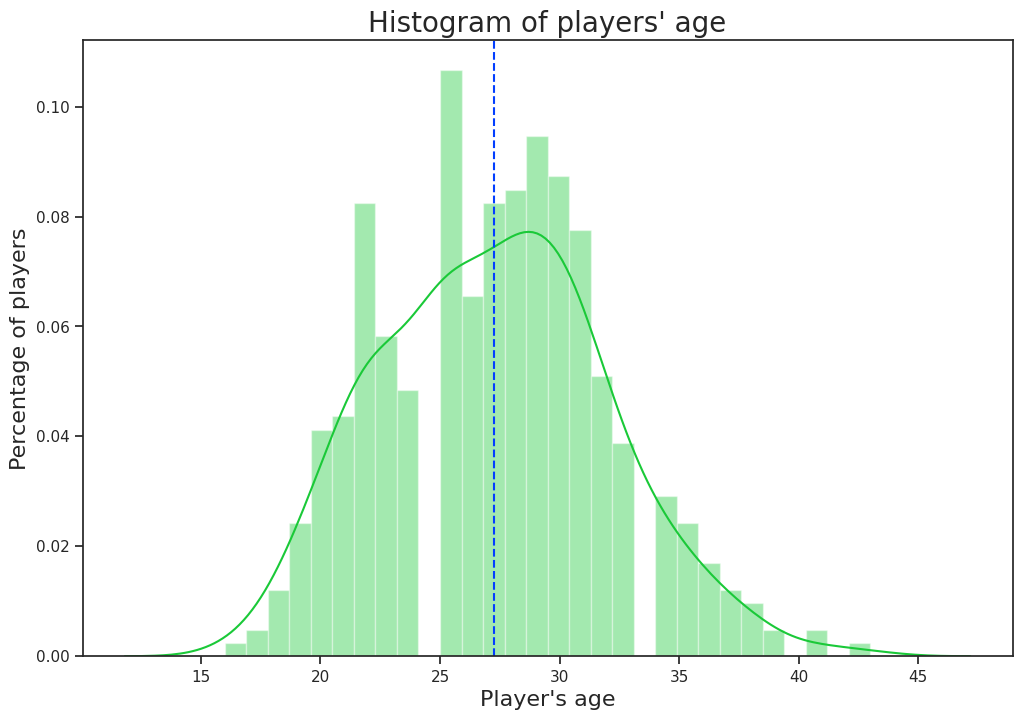

In [15]:
# Histogram: number of players's age
sns.set(style ="ticks", palette = 'bright', color_codes=True)

x = df.Age
plt.figure(figsize=(12,8))
ax = sns.distplot(x, bins = 30, kde = True, color='g')
ax.set_xlabel(xlabel="Player\'s age", fontsize=16)
ax.set_ylabel(ylabel='Percentage of players', fontsize=16)
ax.set_title(label="Histogram of players' age", fontsize=20)

plt.axvline(x =df['Age'].mean(), ymin = 0, ymax = 1, linestyle = '--')

#Add legend for mean line

print('Mean Age = ', round(df['Age'].mean(),2))
print('Median Age = ', round(df['Age'].median(),2))
print('SD Age = ', round(df['Age'].std(),2))

plt.show()

## Position Analysis

/tmp/ipykernel_2122/1718813364.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = 'Position', data = df, palette = 'hls');


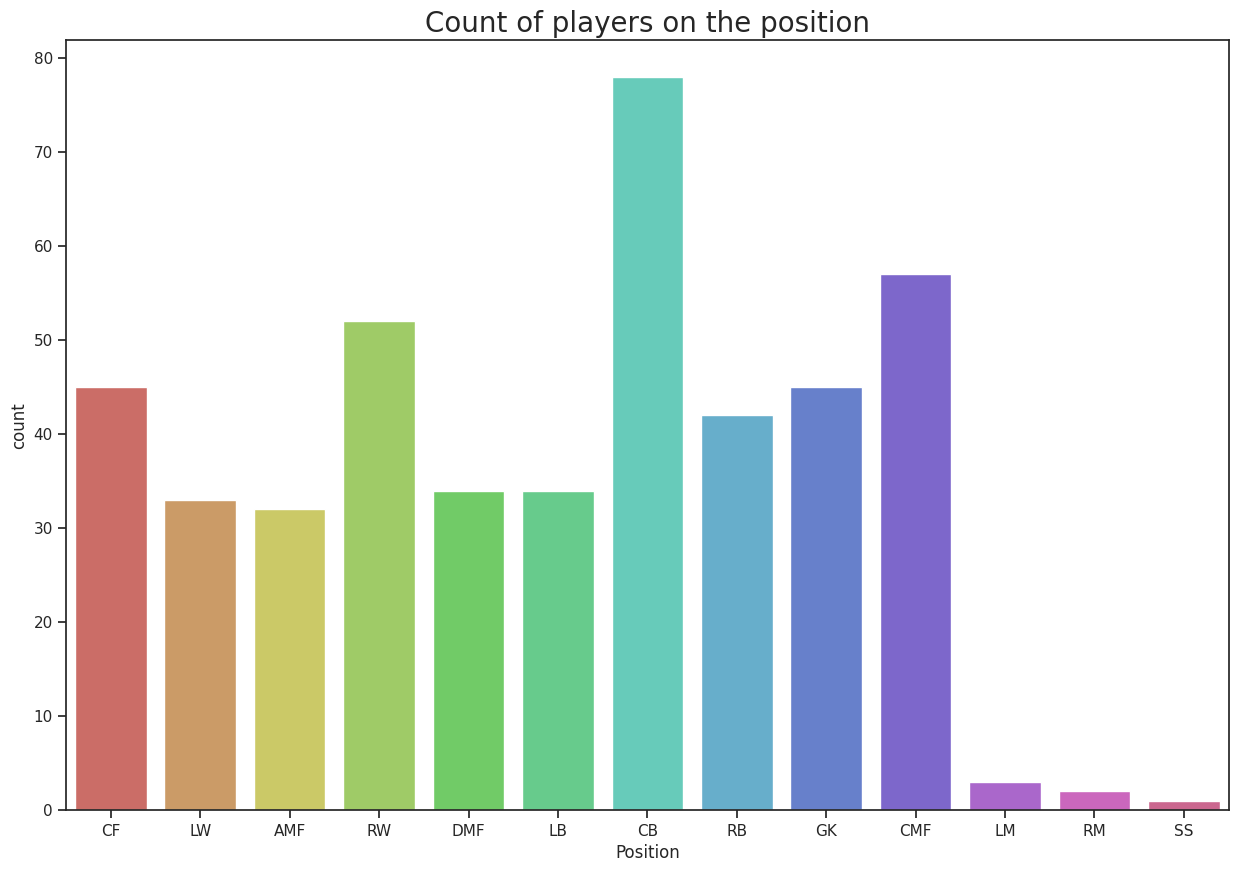

In [16]:
# All of position
f, ax = plt.subplots(figsize=(15, 10))

ax = sns.countplot(x = 'Position', data = df, palette = 'hls');
ax.set_title(label='Count of players on the position', fontsize=20);

/tmp/ipykernel_2122/2875590455.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = 'Position Group', data = df, palette = 'hls',


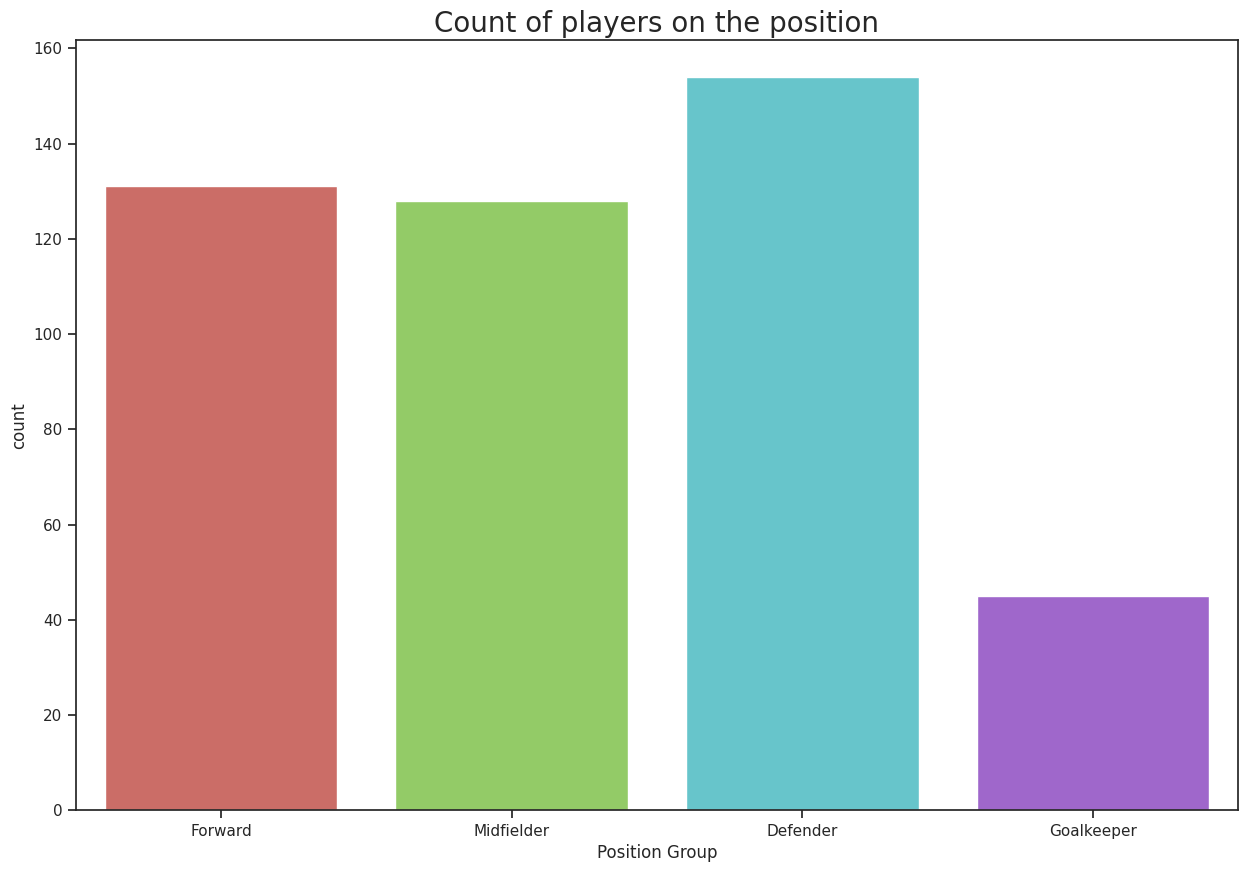

In [17]:
# All of position
f, ax = plt.subplots(figsize=(15, 10))

ax = sns.countplot(x = 'Position Group', data = df, palette = 'hls',
                   order = ['Forward', 'Midfielder', 'Defender', 'Goalkeeper'])

ax.set_title(label='Count of players on the position', fontsize=20);

## Correlation Analysis

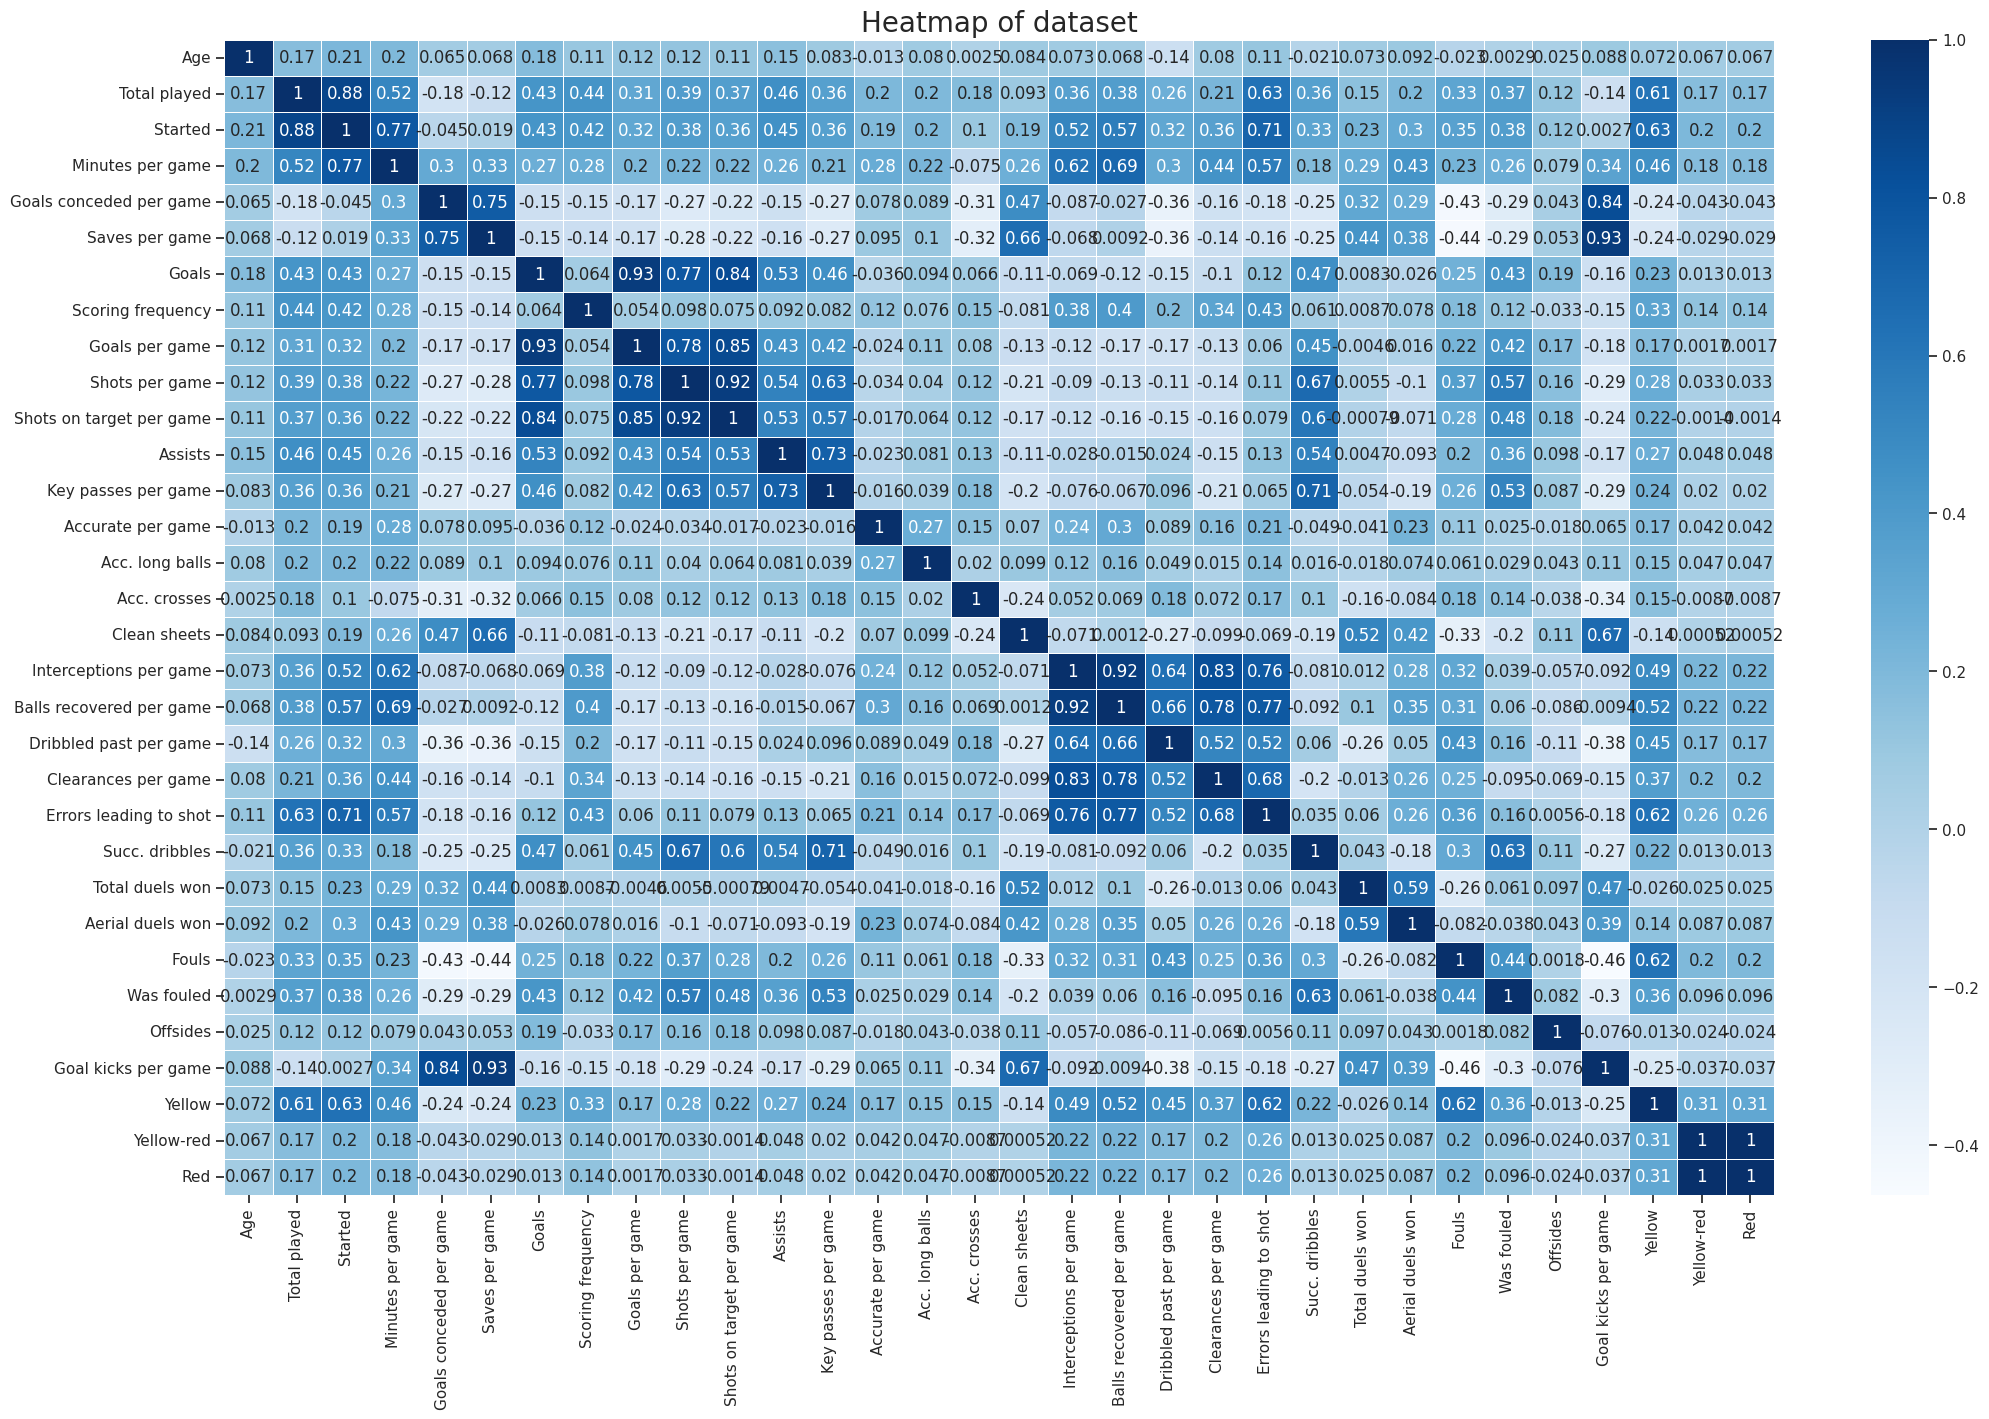

In [18]:
# Correlation heatmap
#plt.rcParams['figure.figsize']=(25,16)

f, ax = plt.subplots(figsize=(25, 15))

hm=sns.heatmap(df[['Age', 'Total played', 'Started', 'Minutes per game',
                'Goals conceded per game', 'Saves per game', 'Goals', 'Scoring frequency', 'Goals per game', 
                'Shots per game', 'Shots on target per game','Assists', 'Key passes per game', 'Accurate per game', 
                'Acc. long balls', 'Acc. crosses','Clean sheets',
                'Interceptions per game', 'Balls recovered per game', 'Dribbled past per game',
                'Clearances per game', 'Errors leading to shot', 'Succ. dribbles', 'Total duels won',
                'Aerial duels won', 'Fouls', 'Was fouled', 'Offsides',
                'Goal kicks per game', 'Yellow', 'Yellow-red', 'Red']].corr(), annot = True, linewidths=.5, cmap='Blues')
hm.set_title(label='Heatmap of dataset', fontsize=20)
hm;

# Machine Learning Process

In [19]:
predictors = df[['Age', 'Total played', 'Started', 'Minutes per game',
                'Goals conceded per game', 'Saves per game', 'Goals', 'Scoring frequency', 'Goals per game', 
                'Shots per game', 'Shots on target per game','Assists', 'Key passes per game', 'Accurate per game', 
                'Acc. long balls', 'Acc. crosses','Clean sheets',
                'Interceptions per game', 'Balls recovered per game', 'Dribbled past per game',
                'Clearances per game', 'Errors leading to shot', 'Succ. dribbles', 'Total duels won',
                'Aerial duels won', 'Fouls', 'Was fouled', 'Offsides',
                'Goal kicks per game', 'Yellow', 'Yellow-red', 'Red']]
columns = ['Age', 'Total played', 'Started', 'Minutes per game',
                'Goals conceded per game', 'Saves per game', 'Goals', 'Scoring frequency', 'Goals per game', 
                'Shots per game', 'Shots on target per game','Assists', 'Key passes per game', 'Accurate per game', 
                'Acc. long balls', 'Acc. crosses','Clean sheets',
                'Interceptions per game', 'Balls recovered per game', 'Dribbled past per game',
                'Clearances per game', 'Errors leading to shot', 'Succ. dribbles', 'Total duels won',
                'Aerial duels won', 'Fouls', 'Was fouled', 'Offsides',
                'Goal kicks per game', 'Yellow', 'Yellow-red', 'Red']

In [20]:
scl = StandardScaler()

predictors_scaled = pd.DataFrame(scl.fit_transform(predictors), columns=columns)

In [21]:
predictors_scaled.head()

,Age,Total played,Started,Minutes per game,Goals conceded per game,Saves per game,Goals,Scoring frequency,Goals per game,Shots per game,...,Succ. dribbles,Total duels won,Aerial duels won,Fouls,Was fouled,Offsides,Goal kicks per game,Yellow,Yellow-red,Red
0,0.791372,1.273608,1.512854,1.215653,-0.288897,-0.295431,5.369111,-0.378631,4.397509,3.237291,...,1.020998,-0.121382,0.329332,0.016942,1.433711,1.015636,-0.313811,0.003124,2.167569,2.167569
1,0.580278,1.076909,0.666608,0.233408,-0.288897,-0.295431,0.665041,0.191892,0.250965,1.844829,...,3.993770,0.591350,-0.398095,0.191699,0.960991,0.386019,-0.313811,0.003124,-0.358504,-0.358504
2,-0.264098,-0.004939,-0.931856,-1.444593,-0.288897,-0.295431,0.077032,-0.188456,0.250965,0.173875,...,-0.564481,0.377530,0.800020,-1.031602,-0.929889,-0.033726,-0.313811,0.003124,-0.358504,-0.358504
3,0.580278,-0.988437,-0.837828,-0.871617,-0.288897,-0.295431,-0.510977,-0.610214,-0.578343,-0.104617,...,-0.069019,-0.477749,-0.398095,0.191699,0.015551,-0.033726,-0.313811,-0.354555,-0.358504,-0.358504
4,-0.686286,0.978559,1.042717,0.683604,-0.288897,-0.295431,1.547054,-0.093369,1.080274,1.984075,...,2.309199,0.092437,-0.783203,0.541213,0.803418,0.176146,-0.313811,-0.712234,2.167569,2.167569


In [22]:
def recommended_k_players_df(player, k_players = 100):
    pos_group = list(df['Position Group'][df['Name']==player])[0]

    if pos_group == 'Forward':
        indices = list(df[(df['Position Group'] == 'Forward')|(df['Position Group'] == 'Midfielder')].index.values)
    elif pos_group == 'Midfielder':
        indices = list(df[(df['Position Group'] == 'Forward')|(df['Position Group'] == 'Midfielder')].index.values)
    elif pos_group == 'Defender':
        indices = list(df[(df['Position Group'] == 'Defender')|(df['Position Group'] == 'Forward')].index.values)
    elif pos_group == 'Goalkeeper':
        indices = list(df[(df['Position Group'] == 'Goalkeeper')].index.values)

    predictors_scaled_subset = predictors_scaled.iloc[indices, :]
    predictors_subset = predictors.iloc[indices, :]

    #Fit KNN for the k_players within that position group
    recommendations = NearestNeighbors(n_neighbors=k_players, algorithm='auto').fit(predictors_scaled_subset)

    #Pass the player name from the dataset to the function and get 5 similar players as output
    player_indices = recommendations.kneighbors(predictors_scaled_subset)[1]

    #Get player index
    df_subset = df.iloc[indices,:].reset_index()
    index = df_subset[df_subset['Name']==player].index.tolist()[0]

    #Make variables global
    global recommend_list
    global recommended_df
    global recommended_names

    recommended_list = []

    recommended_df = predictors_subset.iloc[list(player_indices[index][:]),:]
    recommend_list = list(df_subset.iloc[list(player_indices[index][:]),:].ID)
    recommend_list.insert(0, index)

    recommended_names = df['Name'][df.ID.isin(recommend_list)]
    return recommend_list, recommended_names, recommended_df

In [23]:
player = str(input("Enter the player you are looking for: \n"))
num_of_players = input("Enter the number of similar players you are looking for: \n")

recommendation = recommended_k_players_df(player, (int(num_of_players)))
print("Here are {0} players similar to ".format(int(num_of_players)) +  player + ': \n \n' + str(recommendation[1][:]))
print("\n Here are the players' features ")
display(recommendation[2].set_index(pd.Index(df.Name[list(recommendation[0][1:])].values)))

Enter the player you are looking for: 
 Rezaldi Hehanusa
Enter the number of similar players you are looking for: 
 4


Here are 4 players similar to Rezaldi Hehanusa: 
 
142    Buyung Ismu Lessy
219        Bayu Setiawan
246         Sirvi Arvani
322     Muhammad Rochman
392     Rezaldi Hehanusa
Name: Name, dtype: object

 Here are the players' features 


,Age,Total played,Started,Minutes per game,Goals conceded per game,Saves per game,Goals,Scoring frequency,Goals per game,Shots per game,...,Succ. dribbles,Total duels won,Aerial duels won,Fouls,Was fouled,Offsides,Goal kicks per game,Yellow,Yellow-red,Red
Rezaldi Hehanusa,28,25,18,73,0.0,0.0,0,0,0.0,0.5,...,1.2,40,41,0.9,0.4,0.00,0.00,6,0,0
Muhammad Rochman,29,28,23,75,0.0,0.0,0,0,0.0,0.3,...,0.8,33,50,1.5,0.5,0.04,0.04,8,0,0
Bayu Setiawan,25,15,11,75,0.0,0.0,0,0,0.0,0.2,...,0.6,32,28,1.3,0.9,0.07,0.00,5,0,0
Buyung Ismu Lessy,25,30,16,60,0.0,0.0,0,0,0.0,0.5,...,1.4,39,35,0.6,1.0,0.07,0.00,6,0,0
